# Modeling Cross Section Data with KNN

In [192]:
import pandas as pd
import itertools
import numpy as np
import os
from joblib import dump
import time
from sklearn.neighbors import KNeighborsRegressor
import sys
from sklearn.model_selection import train_test_split

# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.exfor.data_utilities as exfor_utils 
import nucml.datasets as nuc_data 
import nucml.general_utilities as gen_utils
import nucml.model.model_utilities as model_utils
import nucml.exfor.plotting_utilities as exfor_plot
import nucml.general_utilities as gen_utils

In [193]:
import importlib
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(nuc_data)
importlib.reload(gen_utils)
importlib.reload(exfor_plot)
print("Finish re-loading scripts.")

Finish re-loading scripts.


# Loading Training Results

In [194]:
results_b0 = pd.read_csv("1_KNN/knn_results_B0.csv")
results_b1 = pd.read_csv("1_KNN/knn_results_B1.csv")

# Loading Best Models

In [197]:
best_b0 = model_utils.get_best_models_df(results_b0, keep_first=True)
best_b1 = model_utils.get_best_models_df(results_b1, keep_first=True)

In [198]:
best_b0

id distance_metric mt_strategy normalizer  train_mae  train_mse  \
28  16       euclidean     one_hot   standard   0.025762   0.010797   
9    9       manhattan     one_hot   standard   0.025882   0.010964   
37   8       manhattan     one_hot   standard   0.025939   0.011031   

    train_evs  train_mae_m  train_r2   val_mae  ...  test_mae  test_mse  \
28   0.985991          0.0  0.985991  0.120330  ...  0.119925  0.063432   
9    0.985770          0.0  0.985770  0.117340  ...  0.117377  0.061497   
37   0.985707          0.0  0.985707  0.117952  ...  0.117185  0.061773   

    test_evs  test_mae_m   test_r2  \
28  0.915093    0.043245  0.915092   
9   0.918433    0.041257  0.918433   
37  0.916968    0.041113  0.916968   

                                           model_path  training_time  \
28  E:\ML_Models_EXFOR\KNN_B0\k16_distance_euclide...    5255.165533   
9   E:\ML_Models_EXFOR\KNN_B0\k9_distance_manhatta...    5361.724394   
37  E:\ML_Models_EXFOR\KNN_B0\k8_distance_manhatta...    4762.610942   

                                          scaler_path  \
28  E:\ML_Models_EXFOR\KNN_B0\k16_distance_euclide...   
9   E:\ML_Models_EXFOR\KNN_B0\k9_distance_manhatta...   
37  E:\ML_Models_EXFOR\KNN_B0\k8_distance_manhatta...   

                                         run_name    tag  
28  k16_distance_euclidean_standard_one_hot_B0_v1  Train  
9    k9_distance_manhattan_standard_one_hot_B0_v1    Val  
37   k8_distance_manhattan_standard_one_hot_B0_v1   Test  

[3 rows x 24 columns]

In [199]:
b0_train_model, b0_train_scaler = model_utils.load_model_and_scaler(best_b0.iloc[[0]])
b1_train_model, b1_train_scaler = model_utils.load_model_and_scaler(best_b1.iloc[[0]])

# Loading EXFOR Data

In [200]:
df_b0, _, _, _, _, to_scale_b0, _ = nuc_data.load_exfor(pedro=True, basic=0)
df_b1, _, _, _, _, to_scale_b1, _ = nuc_data.load_exfor(pedro=True, basic=1)

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: True
INFO:root: LOG: True
INFO:root: BASIC: 0
INFO:root: SCALER: STANDARD
INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/EXFOR/CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4184115, 8)
INFO:root:Splitting dataset into training and testing...
INFO:root:Normalizing dataset...
INFO:root:Fitting new scaler.
INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: True
INFO:root: LOG: True
INFO:root: BASIC: 1
INFO:root: SCALER: STANDARD
INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/EXFOR/CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4184115, 11)
INFO:root:Splitting dataset into training and testing...
INFO:root:Normalizing dataset...
INFO:root:Fitting new scaler.


# Predicting XS for Cl

In [201]:
cl_b0 = exfor_utils.predicting_nuclear_xs_v2(
    df_b0, 17, 35, 103, b0_train_model, to_scale_b0, b0_train_scaler, show=True, save=True, 
    path="Figures/KNN/B0_cl35_np.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)


In [202]:
cl_b1 = exfor_utils.predicting_nuclear_xs_v2(
    df_b1, 17, 35, 103, b1_train_model, to_scale_b1, b1_train_scaler, show=True, save=True, 
    path="Figures/KNN/B1_cl35_np.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)


# Uranium Predictions

In [204]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/U233/endfb8.0/tables/xs/n-U233-MT018.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 15345 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (94567, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (94567, 40)


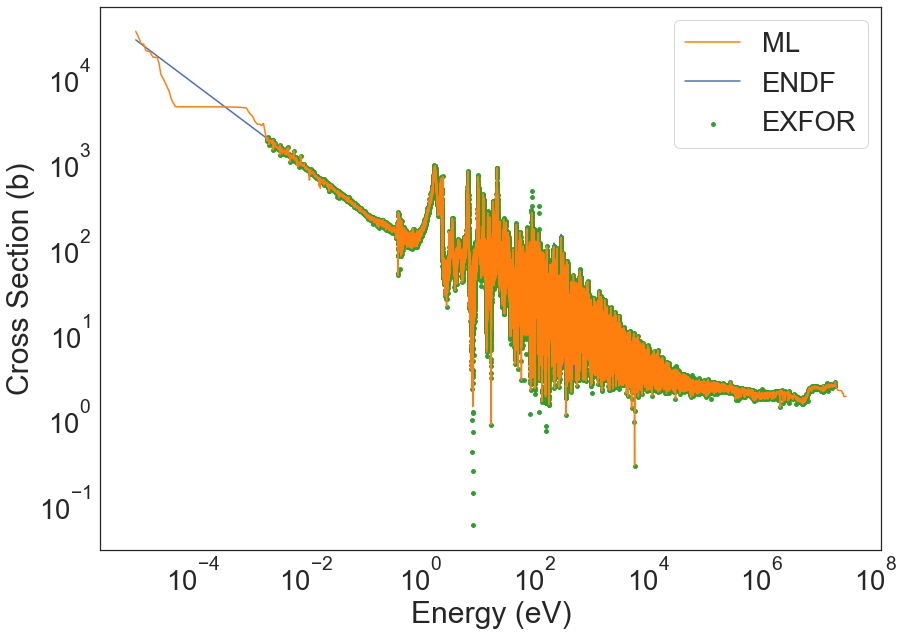

In [205]:
u_b0 = exfor_utils.predicting_nuclear_xs_v2(
    df_b0, 92, 233, 18, b0_train_model, to_scale_b0, b0_train_scaler, show=True, save=True, 
    path="Figures/KNN/B0_u233_fission.png", get_endf=True, log=True, save_both=True,
    plotter="plt", order_dict=order_dict)

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/U233/endfb8.0/tables/xs/n-U233-MT018.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 15345 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (94567, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (94567, 43)


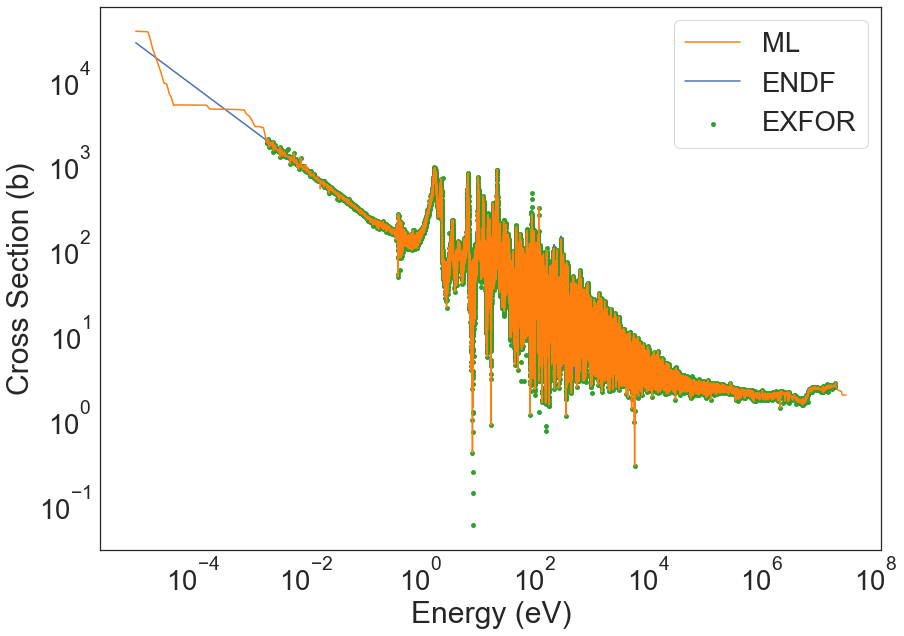

In [206]:
u_b1 = exfor_utils.predicting_nuclear_xs_v2(
    df_b1, 92, 233, 18, b1_train_model, to_scale_b1, b1_train_scaler, show=True, save=True, 
    path="Figures/KNN/B1_u233_fission.png", get_endf=True, log=True, save_both=True,
    plotter="plt", order_dict=order_dict)

# Loading Newly Measured Chlorine (n,p) Unseen Data 

These data points are not in the current EXFOR data package and will be used to test the new modeling capabilities.

In [209]:
new_cl_data_kwargs = {"Z":17, "A":35, "MT":103, "log":True, "scale":True, "scaler":knn_train_scaler, "to_scale":to_scale, "one_hot":True}
new_cl_data = exfor_utils.load_newdata("../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df_b1, **new_cl_data_kwargs)
new_cl_data.head()

INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (12, 43)


Energy      Data         Z         N     A  Atomic_Mass_Micro  \
0  6.383815 -1.779892 -1.129089 -1.113723 -1.12       3.496885e+07   
1  6.383815 -1.707744 -1.129089 -1.113723 -1.12       3.496885e+07   
2  6.401401 -1.583359 -1.129089 -1.113723 -1.12       3.496885e+07   
3  6.401401 -1.590067 -1.129089 -1.113723 -1.12       3.496885e+07   
4  6.411620 -1.350665 -1.129089 -1.113723 -1.12       3.496885e+07   

   Nucleus_Radius  Neutron_Nucleus_Radius_Ratio  MT_1  MT_101  ...  MT_33  \
0        4.088833                      0.195655     0       0  ...      0   
1        4.088833                      0.195655     0       0  ...      0   
2        4.088833                      0.195655     0       0  ...      0   
3        4.088833                      0.195655     0       0  ...      0   
4        4.088833                      0.195655     0       0  ...      0   

   MT_4  MT_41  MT_51  MT_9000  MT_9001  Center_of_Mass_Flag_Center_of_Mass  \
0     0      0      0        0        0                                   0   
1     0      0      0        0        0                                   0   
2     0      0      0        0        0                                   0   
3     0      0      0        0        0                                   0   
4     0      0      0        0        0                                   0   

   Center_of_Mass_Flag_Lab  Element_Flag_I  Element_Flag_N  
0                        1               1               0  
1                        1               1               0  
2                        1               1               0  
3                        1               1               0  
4                        1               1               0  

[5 rows x 43 columns]

In [213]:
new_cl = exfor_utils.predicting_nuclear_xs_v2(
    df_b1, 17, 35, 103, b1_train_model, to_scale_b1, b1_train_scaler, show=True, save=False, 
    path="Figures/KNN/B1_chlorine_35_np_new.png", get_endf=True, 
    log=True, new_data=new_cl_data, save_both=True)

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
